  0%|          | 0/16 [00:00<?, ?it/s]Using custom data configuration fathyshalab--reklamation24_oeffentlichkeit-soziales-v2-400d1fbd9d2bf75e
Found cached dataset parquet (C:/Users/f.shalaby/.cache/huggingface/datasets/fathyshalab___parquet/fathyshalab--reklamation24_oeffentlichkeit-soziales-v2-400d1fbd9d2bf75e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

perplexity must be less than n_samples


  6%|▋         | 1/16 [01:02<15:43, 62.91s/it]

Unable to open file (truncated file: eof = 353370112, sblock->base_addr = 0, stored_eof = 581770154)
[Errno 2] Unable to open file (unable to open file: name = 'emb/mode-schmuck-zubehoer_test_avgembedding.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
[Errno 2] Unable to open file (unable to open file: name = 'emb/moebel-einrichtungshaeuser_test_avgembedding.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
[Errno 2] Unable to open file (unable to open file: name = 'emb/finanzen_test_avgembedding.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Unable to open file (truncated file: eof = 413925376, sblock->base_addr = 0, stored_eof = 1316011609)
Unable to open file (truncated file: eof = 292814848, sblock->base_addr = 0, stored_eof = 1086569493)
Unable to open file (truncated file: eof = 837812224, sblock->base_addr = 0, stored_eof = 1540096445)
[Errno 2] Unable to open file (

Using custom data configuration fathyshalab--reklamation24_versicherungen-recht-v2-5bb6bd71de7739e9
Found cached dataset parquet (C:/Users/f.shalaby/.cache/huggingface/datasets/fathyshalab___parquet/fathyshalab--reklamation24_versicherungen-recht-v2-5bb6bd71de7739e9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

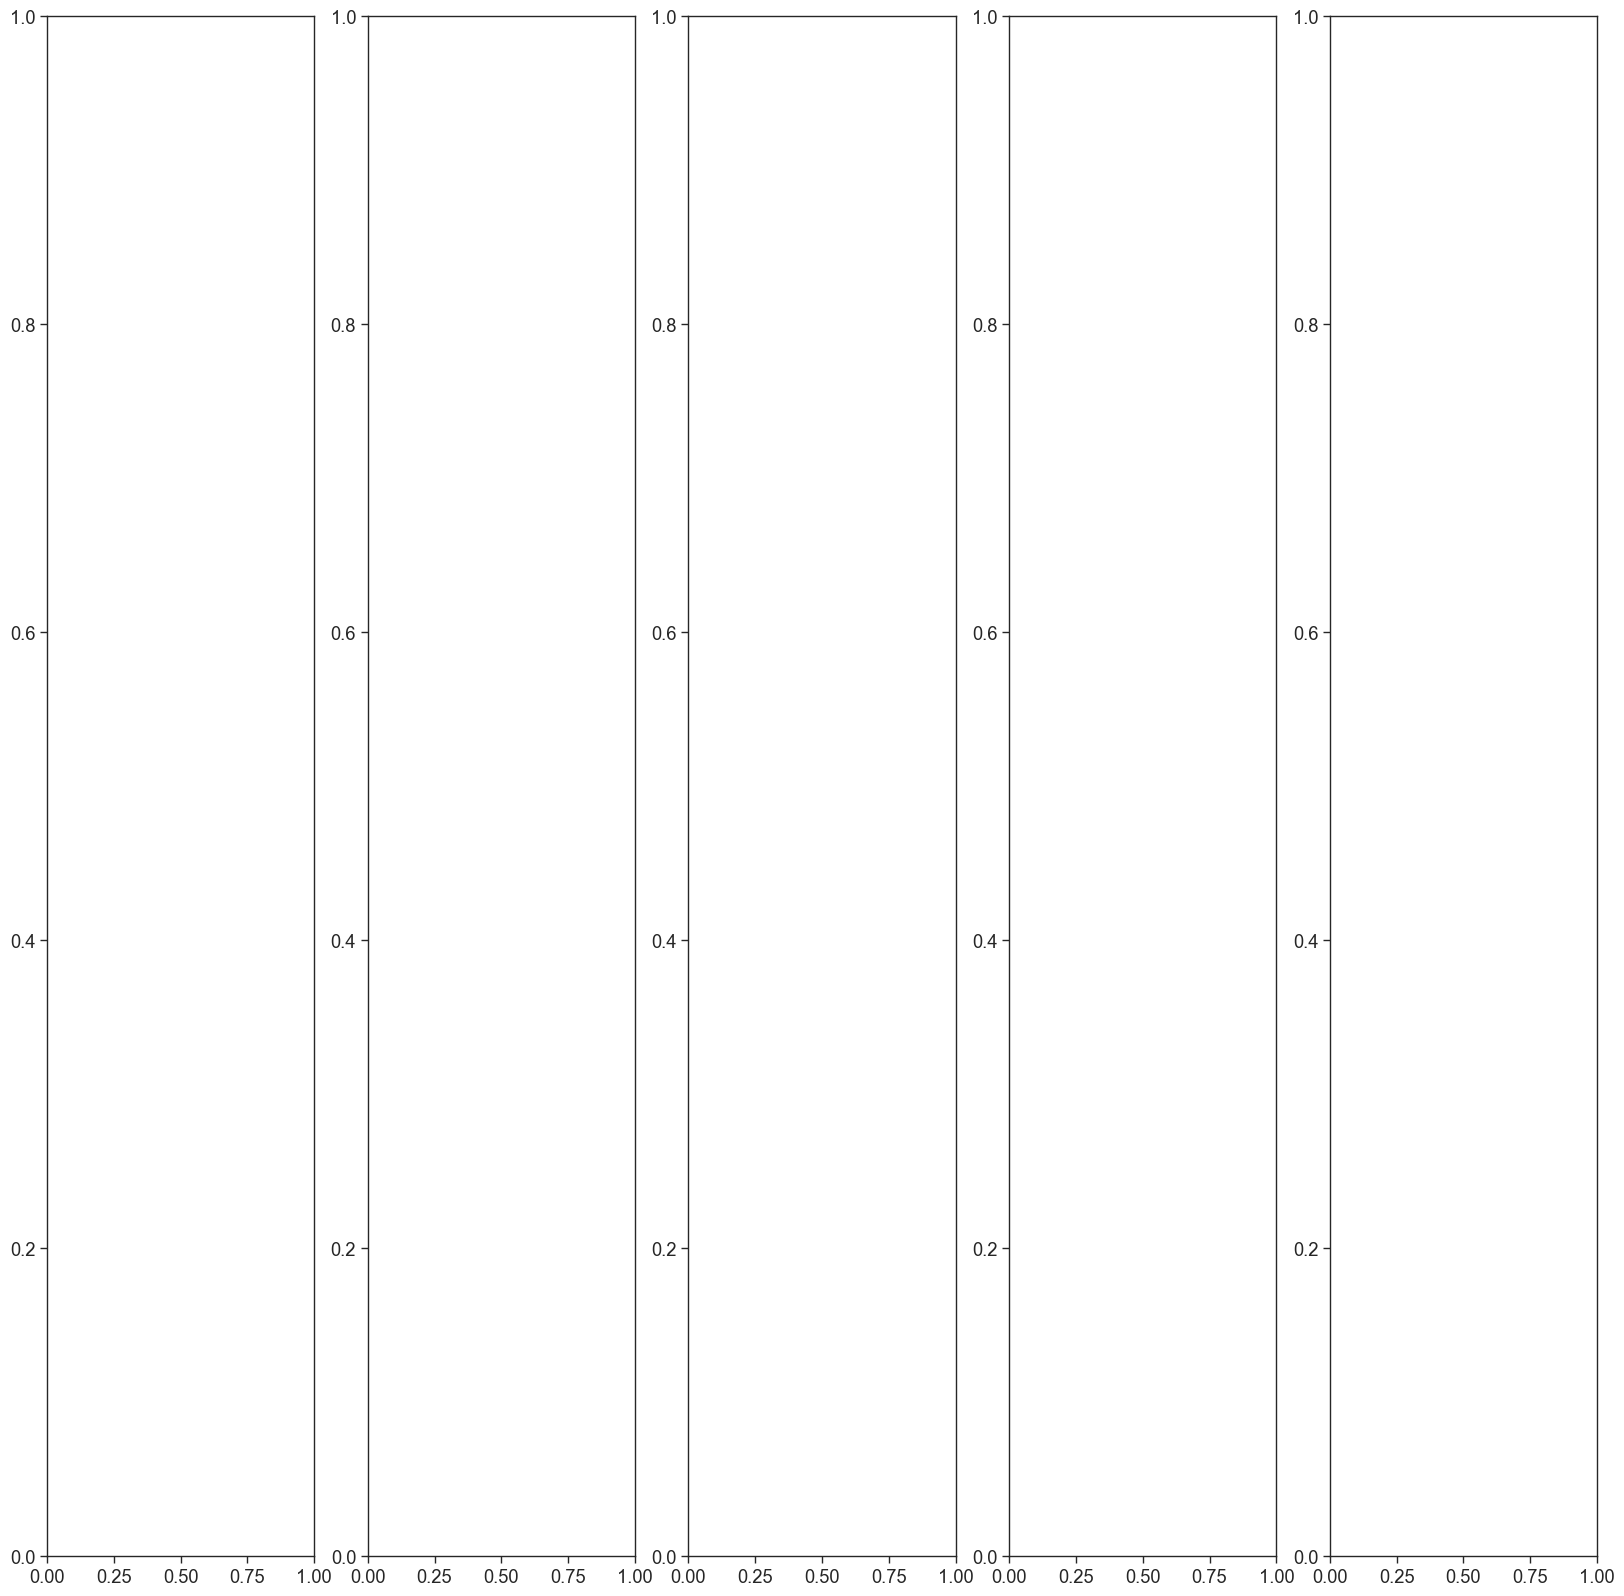

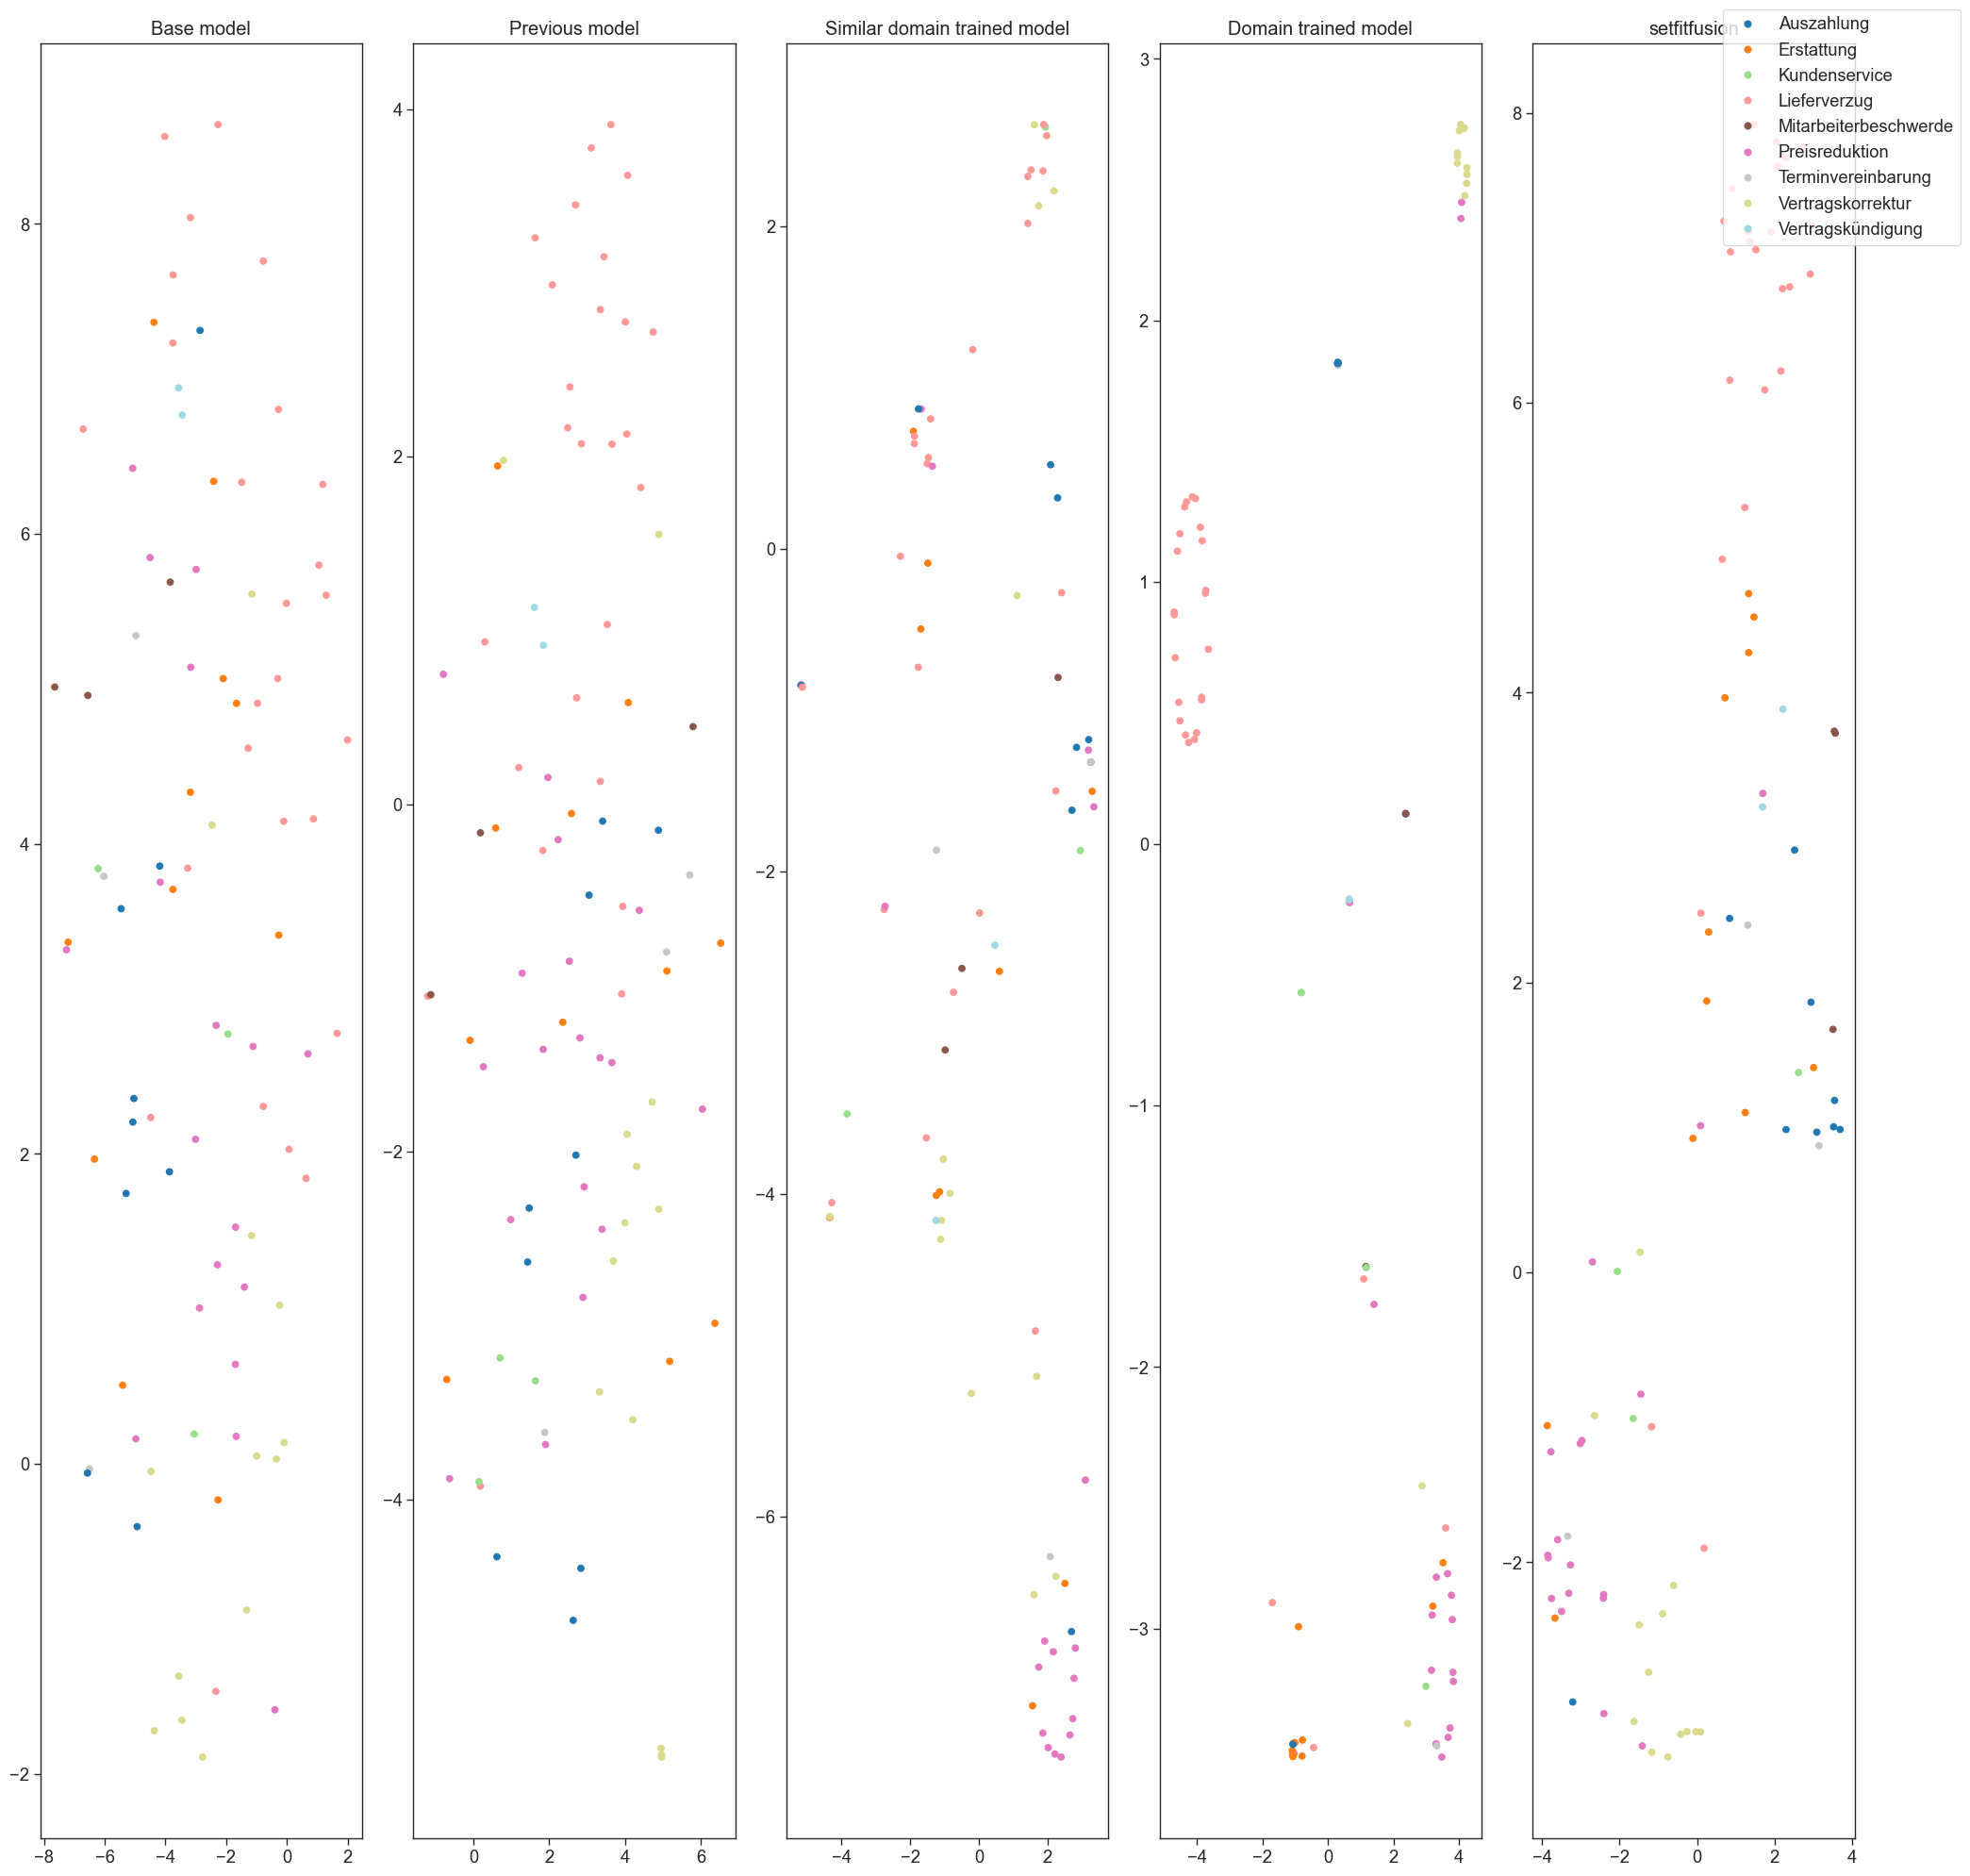

100%|██████████| 16/16 [02:29<00:00,  9.31s/it]

Unable to open file (truncated file: eof = 116916224, sblock->base_addr = 0, stored_eof = 1217696685)
Unable to open file (truncated file: eof = 158859264, sblock->base_addr = 0, stored_eof = 974646441)
Unable to open file (truncated file: eof = 1216348160, sblock->base_addr = 0, stored_eof = 1694198984)
[Errno 2] Unable to open file (unable to open file: name = 'emb/haus-reinigung_test_avgembedding.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
[Errno 2] Unable to open file (unable to open file: name = 'emb/full_test_avgembedding.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [11]:
import sentence_transformers
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from datasets import load_dataset
from tqdm import tqdm 
import hickle as hkl
def plot_embeedings(previous_model_name,trained_model_name,domain_trained_model_name,test_dataset,base_model_name="sentence-transformers/all-roberta-large-v1",domain=None,setfitfusion_embeeding=None):
    # Plot the embeedings of the previous model and the trained model to see the difference
    # Load a SetFit model from Hub
    # give a legend what the different colors which label is
    labels = np.unique(test_dataset["label_name"])
    # use 14  very distinct colors
   
    base_model = sentence_transformers.SentenceTransformer(base_model_name)
    previous_model = sentence_transformers.SentenceTransformer(previous_model_name)
    trained_model =sentence_transformers.SentenceTransformer(trained_model_name)
    domain_model = sentence_transformers.SentenceTransformer(domain_trained_model_name)
    base_embeddings = base_model.encode(test_dataset["text"])
    prev_embeddings = previous_model.encode(test_dataset["text"])
    trained_embeddings = trained_model.encode(test_dataset["text"])
    domain_embeddings = domain_model.encode(test_dataset["text"])
    setfitfusion_embeedings = setfitfusion_embeeding
    # Plot the embeedings of the previous model and the trained model to see the difference with color coding of the labels

    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    # use a tsne to reduce the dimensionality of the embeddings
    tsne = TSNE(n_components=2, random_state=0)
    base_embeddings = tsne.fit_transform(base_embeddings)
    prev_embeddings = tsne.fit_transform(prev_embeddings)
    trained_embeddings = tsne.fit_transform(trained_embeddings)
    domain_embeddings = tsne.fit_transform(domain_embeddings)
    setfitfusion_embeedings = tsne.fit_transform(setfitfusion_embeedings)

    # plot the embeddings
    colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))
    handles = [plt.plot([], [], marker="o", ls="", color=colors[i])[0] for i in range(len(labels))]
    ax[0].scatter(base_embeddings[:, 0], base_embeddings[:, 1], c=colors[test_dataset["label"]])
    ax[0].set_title("Base model")	
    ax[1].scatter(prev_embeddings[:, 0], prev_embeddings[:, 1],c=colors[test_dataset["label"]])
    ax[1].set_title("Previous model")
    ax[2].scatter(trained_embeddings[:, 0], trained_embeddings[:, 1], c=colors[test_dataset["label"]])
    ax[2].set_title("Similar domain trained model")
    ax[3].scatter(domain_embeddings[:, 0], domain_embeddings[:, 1], c=colors[test_dataset["label"]])
    ax[3].set_title("Domain trained model")
    ax[4].scatter(setfitfusion_embeedings[:, 0], setfitfusion_embeedings[:, 1], c=colors[test_dataset["label"]])
    ax[4].set_title("setfitfusion")
    
    fig.legend(handles, labels, bbox_to_anchor=(1.05, 1))

    fig.tight_layout()
    #SAVE THE FIGURE
    fig.savefig(f"{domain}-embeedings.png")
    plt.show()

    return fig
def get_combo_name(domain):
    df = pd.read_csv("setfit-soupres5new.csv")
    combo_names = df["Combo Name"].values
    domains = df["Domain"].values
    for i in range(len(domains)):
        if domains[i] == domain:
            return combo_names[i]

for domain in tqdm([
        "oeffentlichkeit-soziales",
        "supermaerkte-drogerien",
        "mode-schmuck-zubehoer",
        "moebel-einrichtungshaeuser",
        "finanzen",
        "reisen-tourismus",
        "schoenheit-wellness",
        "unternehmen-verbaende",
        "medizin-gesundheit-pflege",
        "transport-logistik",
        "versicherungen-recht",
        "oeffentlicher-verkehr-vermietung",
        "unterhaltung-kultur-freizeit",
        "wasser-strom-gas",
        "haus-reinigung",
        "full"
    ]):
    try:
        embeddings = hkl.load(f"emb/{domain}_test_avgembedding.hkl")
        dataset = load_dataset(f"fathyshalab/reklamation24_{domain}-v2",use_auth_token=True)

        # if test split is not present, then use validation split as the test split
        if dataset.get("test") is None and dataset.get("validation") is None:
            dataset = dataset["train"].train_test_split(test_size=0.2)
            eval_dataset = dataset["test"]

        elif dataset.get("validation") is None:
            eval_dataset = dataset["test"]

        else:
            eval_dataset = dataset["validation"]

        plot_embeedings("sentence-transformers/paraphrase-multilingual-mpnet-base-v2","fathyshalab/reklambox-haus-reinigung-setfit",f"fathyshalab/reklambox-{domain}-setfit",eval_dataset,domain=domain,setfitfusion_embeeding=embeddings[get_combo_name(domain)])
    except Exception as e:
        print(e)
        continue


In [ ]:
def plot_embeeding(data,model):
    labels = np.unique(data["label_text"])
    predictions = model.predict(data["text"])
    embeeding = model.encode(data["text"])
    tsne = TSNE(n_components=2, random_state=0)
    embeeding = tsne.fit_transform(embeeding)
    colors = plt.cm.tab20(np.linspace(0, 1, 15))
    handles = [plt.plot([], [], marker="o", ls="", color=colors[i])[0] for i in range(len(labels))]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].scatter(embeeding[:, 0], embeeding[:, 1], c=colors[data["label"]])
    ax[1].scatter(embeeding[:, 0], embeeding[:, 1], c=colors[predictions])
    ax[0].legend(handles, labels)
    ax[1].legend(handles, labels)
    ax[0].set_title("True labels")
    ax[1].set_title("Predicted labels")



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_centroid(model_name:str, dataset:str,n:int):
    """Get the centroid of each label and the closest n sentences to each centroid for more concious sampling
    Args:
        model_name (str): the name of the model to use from huggingface
        dataset (str): the dataset to use from huggingface datasets
        n (int): the number of closest sentences to each centroid that would be returned
        Returns:
        closest_sentences (dict): a dictionary with the label as key and the closest n sentences as values
    """
    sentence2embedding = {}
    model = sentence_transformers.SentenceTransformer(model_name)
    embeddings = model.encode(dataset["text"])
    #plot the embeddings
    
    for i in range(len(dataset["text"])):
        sentence2embedding[dataset["text"][i]] = embeddings[i]
    labels = np.unique(dataset["label"])
    dataset = dataset.to_pandas()
    centroids = []
    for label in labels:
        label_embeddings = embeddings[dataset["label"]==label]
        centroid = np.mean(label_embeddings, axis=0)
        centroids.append((centroid,label))
    # find closest n sentence to each centroid
    closest_sentences= {}
    for centroid in centroids:
        closest_sentences[centroid[1]] = []
        label = centroid[1]	
        centroid = centroid[0]
        for sentence, embedding in sentence2embedding.items():
            # only consider sentences with the same label
            if dataset[dataset["text"]==sentence]["label"].values[0] != label:
                continue
            if np.isnan(embedding).any() or np.isnan(centroid).any():
                continue  # skip embeddings with NaN values
            sim = cosine_similarity(centroid.reshape(1, -1), embedding.reshape(1, -1))
            closest_sentences[label].append((sentence,sim))
        closest_sentences[label] = sorted(closest_sentences[label], key=lambda x: x[1], reverse=True)
        closest_sentences[label]= [s[0] for s in closest_sentences[label][:n]]
    return closest_sentences

dataset = load_dataset("fathyshalab/reklambox-1")

# if test split is not present, then use validation split as the test split
if dataset.get("test") is None and dataset.get("validation") is None:
    dataset = dataset["train"].train_test_split(test_size=0.2)
    eval_dataset = dataset["test"]

elif dataset.get("validation") is None:
    eval_dataset = dataset["test"]

else:
    eval_dataset = dataset["validation"]



get_centroid("fathyshalab/clinic-kitchen_and_dining-roberta-domain-adaptation",eval_dataset,5)


In [ ]:
#producing a dataframe where the sentences are under the text column and the labels are under the label column from the dictionarz generated by the get_centroid function
from datasets import Dataset
def get_centroid_df(model_name:str, dataset:str,n:int):

    closest_sentences = get_centroid(model_name, dataset,n)
    df = pd.DataFrame(columns=["text","label"])
    for label, sentences in closest_sentences.items():
        for sentence in sentences:
            df = df.append({"text":sentence,"label":label},ignore_index=True)
    return df

def sample_dataset_centroid(model_name:str, dataset:str,n:int):
    """Sample the dataset based on the centroid of each label
    Args:
        model_name (str): the name of the model to use from huggingface
        dataset (str): the dataset to use from huggingface datasets
        n (int): the number of closest sentences to each centroid that would be returned
        Returns:
        sampled_dataset (dict): a dictionary with the label as key and the closest n sentences as values
    """
    sampled_dataset = {}
    closest_sentences = get_centroid_df(model_name, dataset,n)
    # create a huggingface dataset from the dataframe
    sampled_dataset = Dataset.from_pandas(closest_sentences)
    return sampled_dataset

dataset = load_dataset("fathyshalab/reklambox")

# if test split is not present, then use validation split as the test split
if dataset.get("test") is None and dataset.get("validation") is None:
    dataset = dataset["train"].train_test_split(test_size=0.2)
    eval_dataset = dataset["test"]

elif dataset.get("validation") is None:
    eval_dataset = dataset["test"]

else:
    eval_dataset = dataset["validation"]

sampled_dataset = sample_dataset_centroid("fathyshalab/clinic-kitchen_and_dining-roberta-domain-adaptation",eval_dataset,5)

In [ ]:
sampled_dataset[0]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_closest_sentences(model_name, dataset, label, n):
    sentence2embedding = {}
    model = sentence_transformers.SentenceTransformer(model_name)
    embeddings = model.encode(dataset["text"])
    dataset = dataset.to_pandas()
    for i in range(len(dataset["text"])):
        sentence2embedding[dataset["text"][i]] = embeddings[i]
    label_embeddings = embeddings[dataset["label_name"]==label]
    if len(label_embeddings) == 0:
        raise ValueError(f"No samples with label {label}")
    centroid = np.mean(label_embeddings,axis=0)
    closest_sentences = []
    for sentence, embedding in sentence2embedding.items():
        if np.isnan(embedding).any() or np.isnan(centroid).any():
            continue  # skip embeddings with NaN values
        sim = cosine_similarity(centroid.reshape(-1,1), embedding.reshape(-1,1))
        closest_sentences.append((sentence, sim))
    closest_sentences = sorted(closest_sentences, key=lambda x: x[1], reverse=True)
    return [s[0] for s in closest_sentences[:n]]
model_name = "fathyshalab/clinic-kitchen_and_dining-roberta-domain-adaptation"
label = "austausch"
n = 5
closest_sentences = get_closest_sentences(model_name, eval_dataset, label, n)
print(closest_sentences)


In [ ]:
!pip install hickle

In [5]:
#i have the different setfusion embeedings in a hickle file, plot them and see how they are distributed compared to the original embeddings of the dataset
import hickle as hkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# load the embeddings
domain = "oeffentlichkeit-soziales"
embeddings = hkl.load(f"emb/{domain}_test_avgembedding.hkl")
#select the embeddings of the dataset which have the top scores based on the data in the csv file called setfit-soupres5new.csv, the option with the best score is in the combo name column

df = pd.read_csv("setfit-soupres5new.csv")
combo_names = df["Combo Name"].values
# return me the combo name for the given domain, so find the row where domain is equal to the given domain and return the combo name of that row


        
    

In [8]:
embeddings[get_combo_name(domain)]

array([[-3.5142709e-02,  4.9556628e-01, -6.5832980e-02, ...,
         3.7496483e-01,  4.1064709e-01,  1.0328568e+00],
       [-4.6881128e-02,  5.0215060e-01, -5.3422876e-02, ...,
         3.0281439e-01,  1.5807161e-01,  4.1037631e-01],
       [ 2.2188523e-01,  2.5015798e-01, -1.3929343e-01, ...,
        -3.4565780e-02,  4.7945479e-01, -2.6980150e-02],
       ...,
       [ 3.3273798e-01,  2.0561485e-01,  2.9418912e-02, ...,
        -2.3271874e-01,  2.1266928e-01, -3.3236405e-01],
       [-9.5490128e-02,  3.7744266e-01, -1.3855537e-02, ...,
         1.6514122e-01,  3.4514803e-01,  1.0762737e+00],
       [-4.7080126e-04,  2.2407974e-01,  1.4138196e-01, ...,
         1.9520776e-01,  4.0819958e-01,  8.5923874e-01]], dtype=float32)